In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os, copy
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import time
import math, tqdm
import seaborn as sns
from lib.train import Train
from lib.evaluation import plot_train_val_multiple, plot_train_val

All data generation are based on StateMNISTData but with differnet target functions. StateMNISTData has state equal to the current time step.

|task             | groups | length | directory     |   memoryless | vanilla  | shared | independent | MoW |
|-------------    | ------ | ------ |-------------  | ----------   | ---------| -------|-------------|-----|
|predict digit    | 5      | 5      | samples       |   yes        | no       | yes    | yes         | yes |
|predict digit    | 3      | 9      | repeat        |   yes        | no       | yes    | maybe       | yes |
|predict digit    | 3      | 1-9    | vary_repeat   |   yes        | no       | yes    | maybe       | yes |
|-----------------------
|predict digit    | 1      | 5      | same_task     |   yes        | yes      | yes    | maybe       | yes |
|less data digit  | 3      | 1-9    | scarce        |   yes        | no       | yes    | no          | yes |
|group partial sum| 3      | 1-9    | partial_sum   |   no         | no       | yes    | no          | yes |

Note that shared are always expected to work because it will be given the shared group information. To fail it, simpyly give it wrong sharing information (see repeat b/c there shared is specified as {{0,1,2}, {4,5}, {6,7,8,9}} and it indeed performed worse).


# summary of working and failing experiments

scarce: no memory, partially shared, result as expected

same_task: no memory, all shared, result as expected

partial sum: has memory, all shared, unexpected result

100%|██████████| 6/6 [00:01<00:00,  3.97it/s]


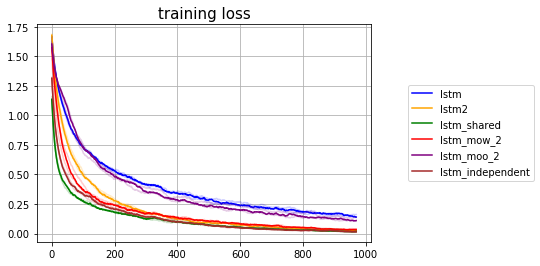

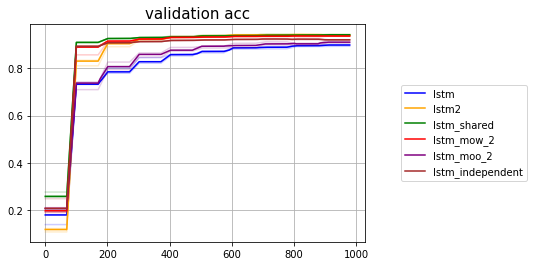

In [156]:
datadir = 'mo_models/scarce_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:00<00:00,  6.69it/s]


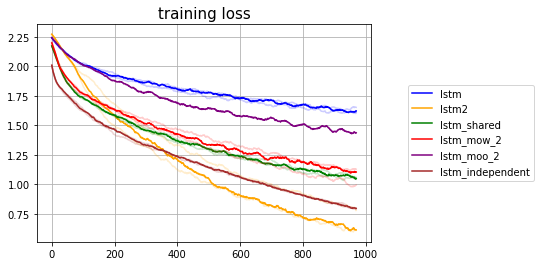

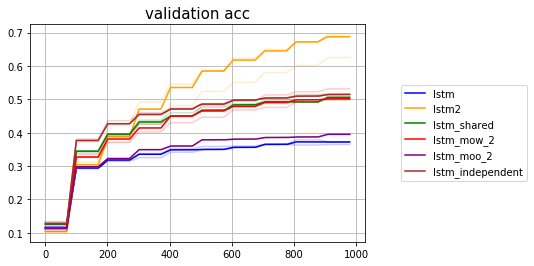

In [111]:
datadir = 'mo_models/partial_sum_share_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:00<00:00,  8.74it/s]


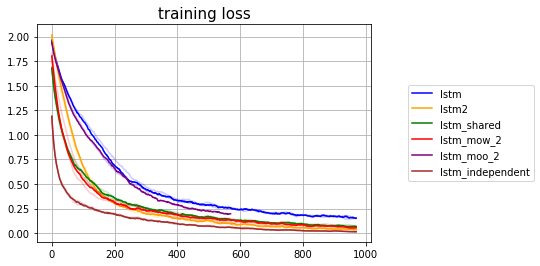

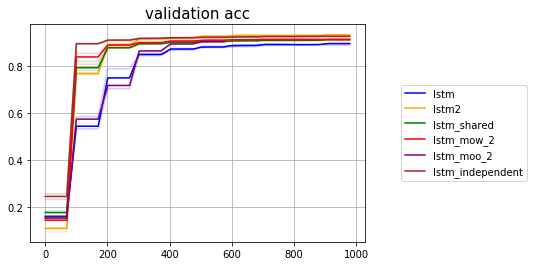

In [107]:
datadir = 'mo_models/diff_task_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:00<00:00,  8.70it/s]


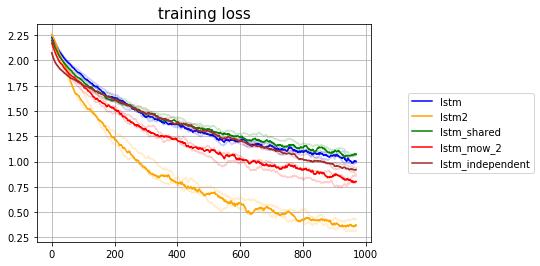

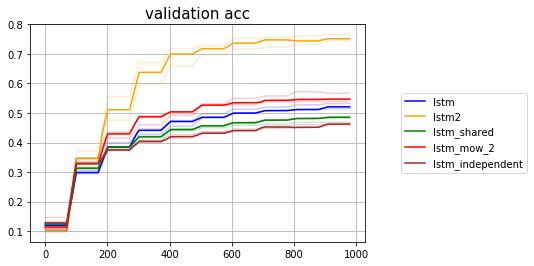

In [100]:
datadir = 'mo_models/partial_sum4_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:01<00:00,  5.67it/s]


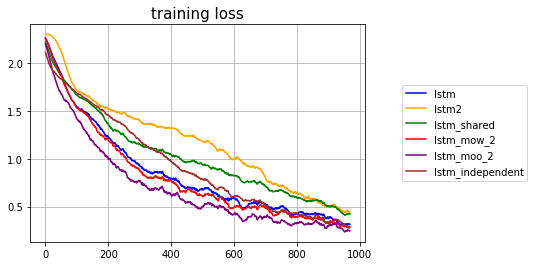

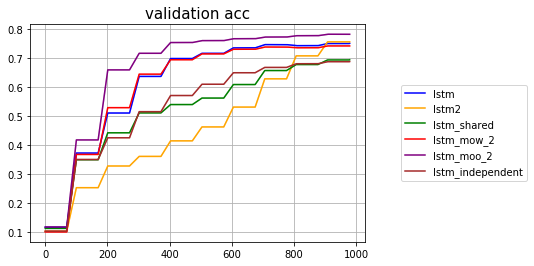

In [158]:
datadir = 'mo_models_2layers/partial_sum4_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:01<00:00,  3.47it/s]


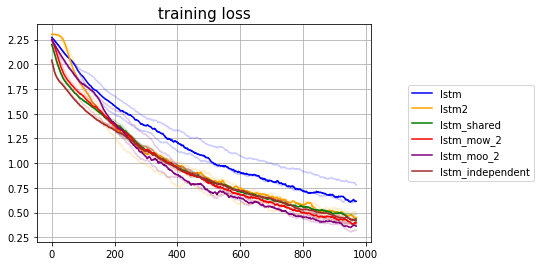

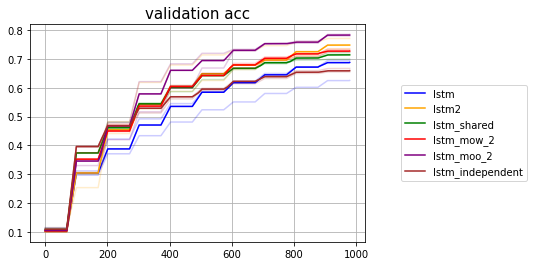

In [147]:
datadir = 'mo_models_2layers/partial_sum_share_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:01<00:00,  4.49it/s]


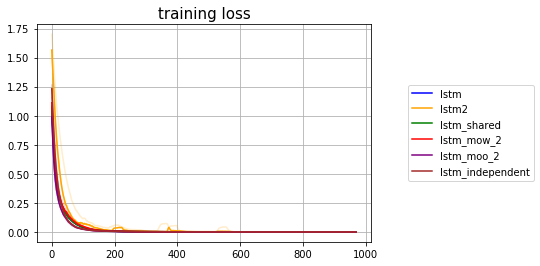

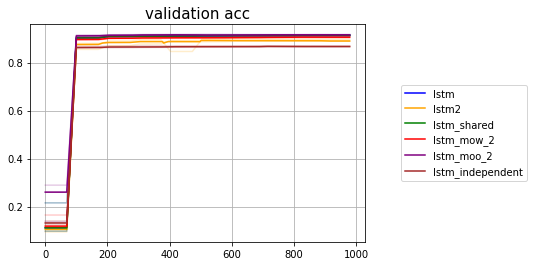

In [150]:
datadir = 'mo_models_2layers/same_task_1000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 6/6 [00:01<00:00,  4.07it/s]


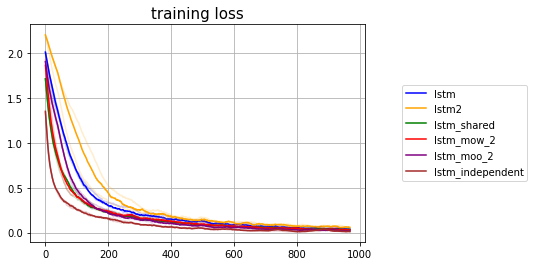

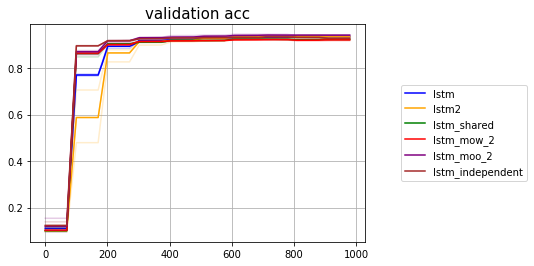

In [152]:
datadir = 'mo_models_2layers/diff_task_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm2.p*',
              'lstm_shared.p*',
              'lstm_mow_2.p*',
              'lstm_moo_2.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


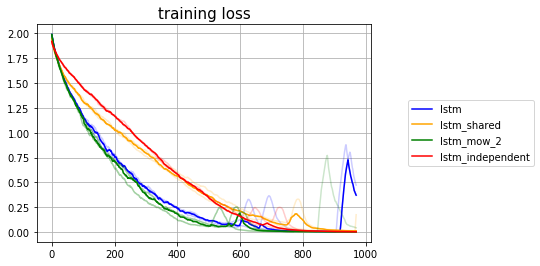

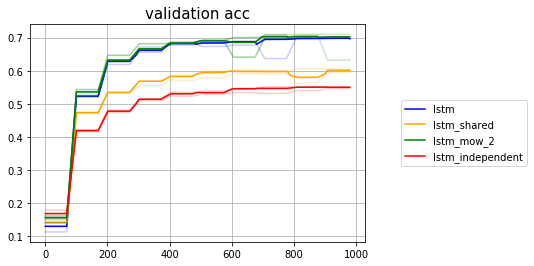

In [63]:
datadir = 'mo_models_300/partial_sum4_10000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm_shared.p*',
              'lstm_mow*.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]


plot_train_val_multiple(rnn_models) 

100%|██████████| 4/4 [00:00<00:00,  6.91it/s]


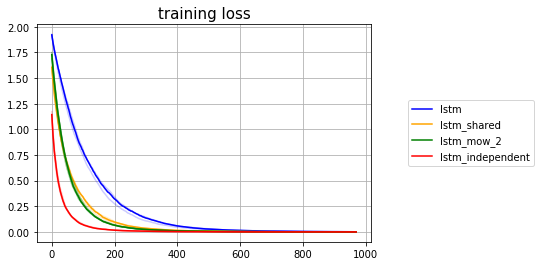

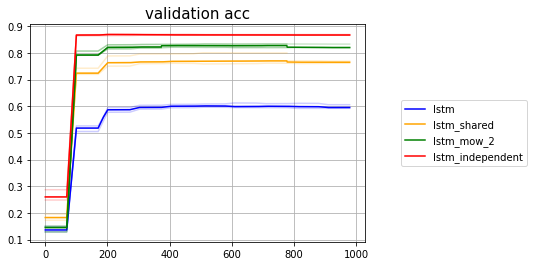

In [179]:
datadir = 'mo_models/diff_task_1000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm_shared.p*',
              'lstm_mow*.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]


plot_train_val_multiple(rnn_models) 

100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


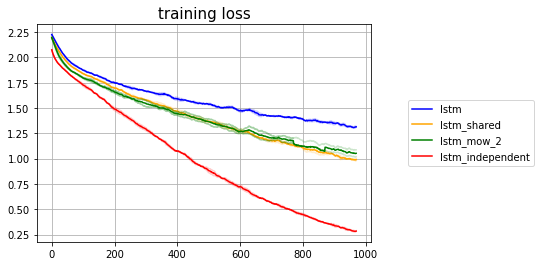

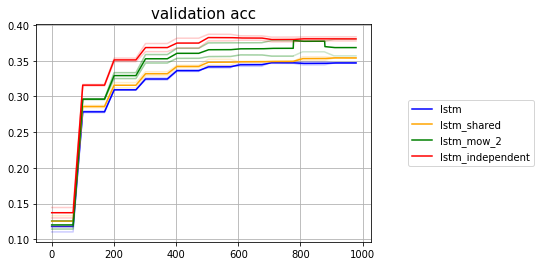

In [180]:
datadir = 'mo_models/diff_memory_5000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm_shared.p*',
              'lstm_mow*.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]

plot_train_val_multiple(rnn_models) 

# established models

100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


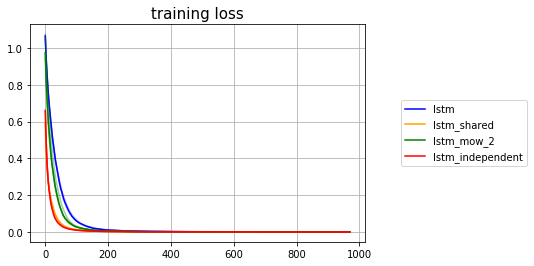

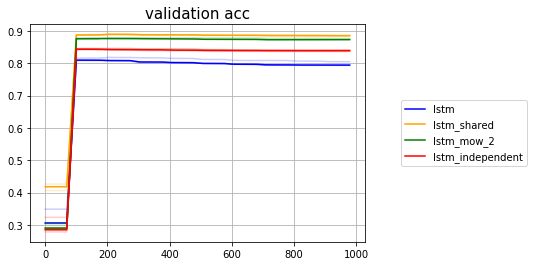

In [184]:
datadir = 'mo_models_100/scarce_1000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm_shared.p*',
              'lstm_mow*.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]


plot_train_val_multiple(rnn_models) 

100%|██████████| 4/4 [00:00<00:00,  7.78it/s]


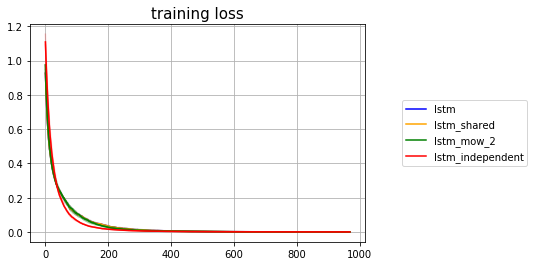

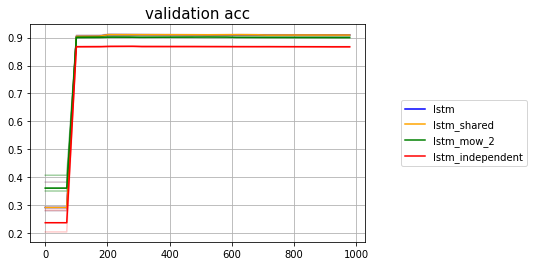

In [186]:
datadir = 'mo_models/same_task_1000/*/'

mlp_models = ['mlp.p*',
              'mlp_shared.p*',
              'mlp_mow*.p*',
              'mlp_independent.p*']
rnn_models = ['lstm.p*',
              'lstm_shared.p*',
              'lstm_mow*.p*',
              'lstm_independent.p*']
mlp_models = [os.path.join(datadir, m) for m in mlp_models]
rnn_models = [os.path.join(datadir, m) for m in rnn_models]


plot_train_val_multiple(rnn_models) 

In [93]:
from collections import defaultdict
def get_datasizes(data_dir_prefix):
    data_sizes = []
    for fn in glob.glob(data_dir_prefix + '_*/'):
        data_sizes.append(int(fn.split('_')[-1][:-1]))
    return sorted(data_sizes)

def plot_datasize(data_dir_prefix, patterns, fontsize=15, colors=['blue', 'orange', 'green', 'red',
                                                                  'purple', 'brown', 'pink', 'gray']):
    sizes = get_datasizes(data_dir_prefix)
    result = defaultdict(list)
    names = [p.split('*')[0].split('/')[-1]for p in patterns]
    for size in sizes:
        for i, pattern in enumerate(patterns):
            pattern = data_dir_prefix + ("_%d/*/" % size) + pattern
            for cpt_fn in glob.glob(pattern):
                cpt = torch.load(cpt_fn)
                name = names[i]
                val_acc = cpt['val_accs'][-1]
                result[name].append((size, val_acc))
                
    for i, k in enumerate(names):
        v = result[k]
        xs = list(map(lambda x: x[0], v))
        ys = list(map(lambda x: x[1], v))
        plt.scatter(xs, ys, label=k, color=colors[i])
        
    plt.legend()
    plt.xlabel('datasize', fontsize=fontsize)
    plt.ylabel('validation accuracy', fontsize=fontsize)
    plt.show()

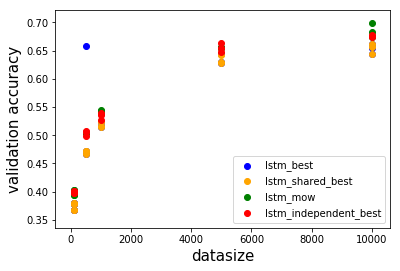

In [213]:
data_dir_prefix = 'mo_models/partial_sum3'

mlp_models = ['mlp_best*',
              'mlp_shared_best*',
              'mlp_mow*_best*',
              'mlp_independent_best*']
rnn_models = ['lstm_best*',
              'lstm_shared_best**',
              'lstm_mow*_best*',
              'lstm_independent_best*']

plot_datasize(data_dir_prefix, rnn_models)

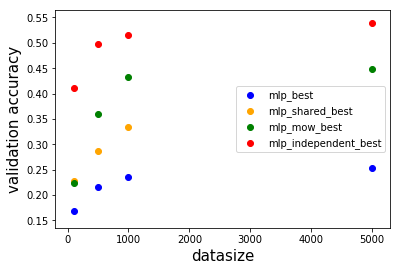

In [97]:
data_dir_prefix = 'mo_models/partial_sum2'

mlp_models = ['mlp_best*',
              'mlp_shared_best*',
              'mlp_mow_best*',
              'mlp_independent_best*']
rnn_models = ['lstm_best*',
              'lstm_shared_best**',
              'lstm_mow_best*',
              'lstm_independent_best*']

plot_datasize(data_dir_prefix, mlp_models)